In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from tools import savefig, fix_figure, coef_var, corrcoef, despine, set_style
import copy

In [2]:
# analys = pd.read_csv('results/orig_analysis/params_1_analyse_30000.csv')
all_data = pd.read_csv('results/params_2_analyse_30000.csv')

# Hit Rate

In [3]:
def mean_square_error(x1, x2):
    return np.sum((x2 - x1)**2) / len(x1.dropna())

def normalize(x, y):
    a = x - x.min()
    return a / a.max() * y.max()

In [49]:
W = all_data.sort_values('weight').reset_index(drop=True)

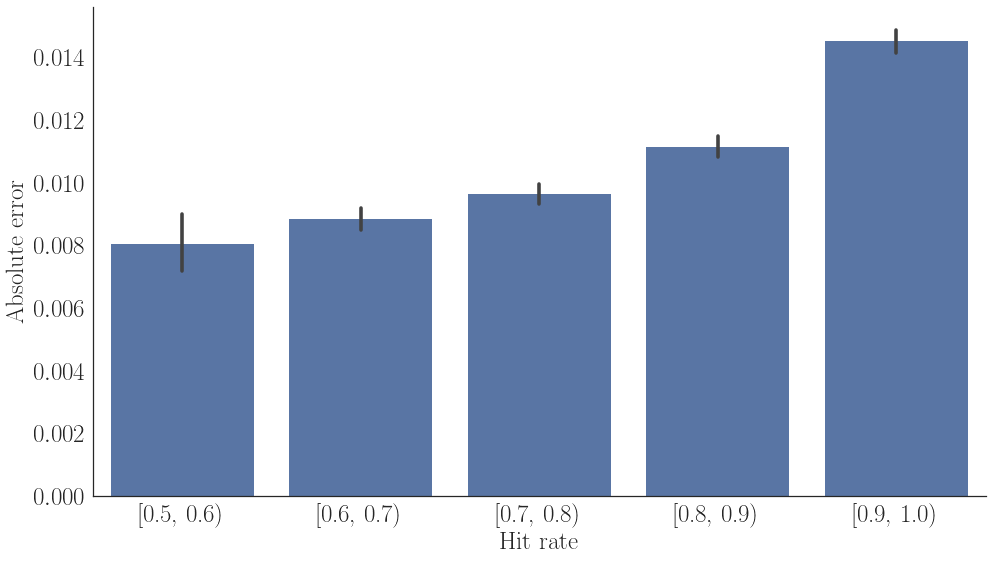

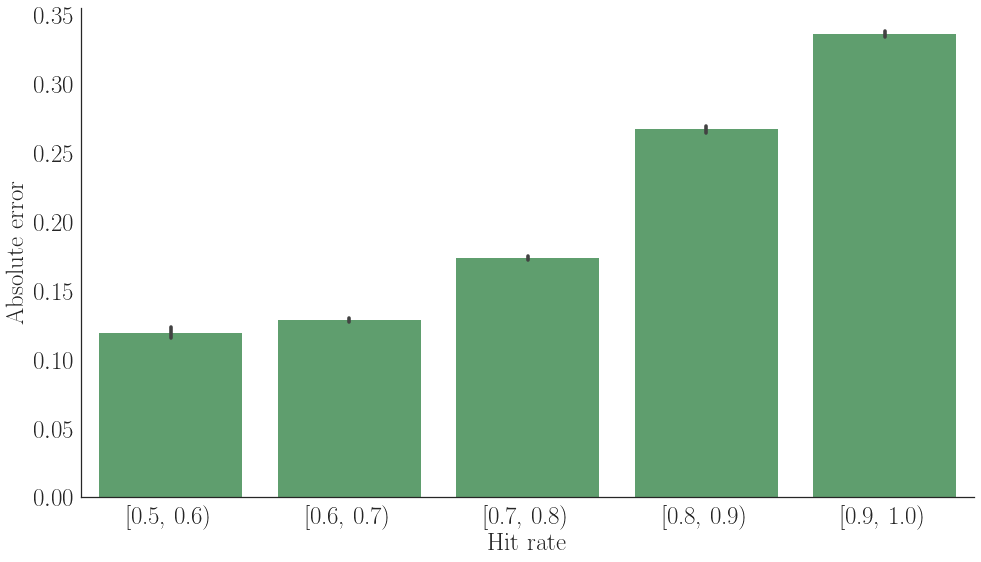

In [50]:
set_style('notebook')
binsize = .1

for idx, (name, prox) in enumerate(zip(['iv_wald', 'cch'], ['IV', 'CCH'])):
    fig = plt.figure()
    estimate = W[name]
    true = normalize(W.weight, estimate)
    diff = abs(estimate - true)
    bins = np.arange(W.hit_rate.min().round(1), W.hit_rate.max().round(1) + binsize, binsize).round(2)[:-1]
    group = pd.DataFrame(
        [diff[(W.hit_rate >= b1) & (W.hit_rate < b2)].values 
         for b1, b2 in zip(bins, bins[1:])],
         index=['[{}, {})'.format(b1, b2) 
                for b1, b2 in zip(bins, bins[1:])])

    sns.barplot(data=group.T, color=sns.color_palette()[idx])
    plt.xlabel('Hit rate')
    plt.ylabel('Absolute error')
    despine()

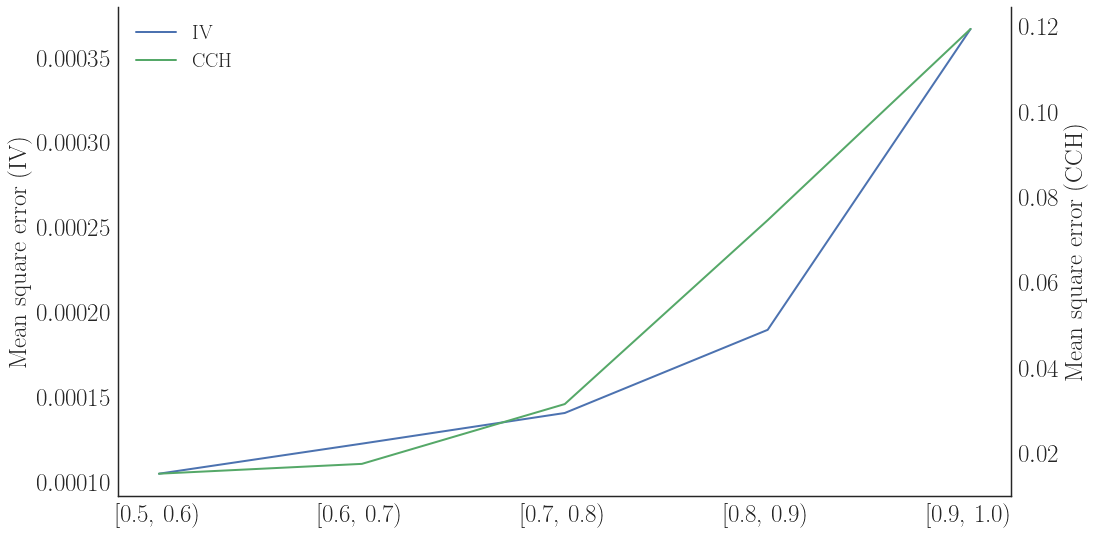

In [51]:
set_style('notebook')
binsize = .1
fig, ax_iv = plt.subplots()
ax_cch = ax_iv.twinx()
handles = []
proxies = ['IV', 'CCH']
for idx, (name, prox, ax) in enumerate(zip(['iv_wald', 'cch'], proxies, [ax_iv, ax_cch])):
    estimate = W[name]
    true = normalize(W.weight, estimate)

    bins = np.arange(W.hit_rate.min().round(1), W.hit_rate.max().round(1) + binsize, binsize).round(2)[:-1]
    error = []
    for b1, b2 in zip(bins, bins[1:]):
        mask = (W.hit_rate >= b1) & (W.hit_rate < b2)
        error.append(mean_square_error(true[mask], estimate[mask]))

    l, = ax.plot(error, label=prox, color=sns.color_palette()[idx])
    handles.append(l)
    labels = ['[{}, {})'.format(b1, b2) for b1, b2 in zip(bins, bins[1:])]
    ax.set_ylabel('Mean square error ({})'.format(prox))
#     ax.legend()
plt.xticks(range(len(error)), labels)
plt.xlabel('Hit rate')
plt.legend(handles, proxies)
despine(right=False, ax=[ax_iv, ax_cch])